# Evidence of Discrimination?

The Department of Developmental Services (DDS) in California is responsible for allocating funds to support over 250,000 developmentally-disabled residents. The data set `ca_dds_expenditures.csv` contains data about 1,000 of these residents. The data comes from a discrimination lawsuit which alleged that California's Department of Developmental Services (DDS) privileged white (non-Hispanic) residents over Hispanic residents in allocating funds. We will focus on comparing the allocation of funds (i.e., expenditures) for these two ethnicities only, although there are other ethnicities in this data set.

There are 6 variables in this data set:

- Id:  5-digit, unique identification code for each consumer (similar to a social security number and used for identification purposes)  
- Age Cohort:  Binned age variable represented as six age cohorts (0-5, 6-12, 13-17, 18-21, 22-50, and 51+)
- Age:  Unbinned age variable
- Gender:  Male or Female
- Expenditures:  Dollar amount of annual expenditures spent on each consumer
- Ethnicity:  Eight ethnic groups (American Indian, Asian, Black, Hispanic, Multi-race, Native Hawaiian, Other, and White non-Hispanic)

# Question 1

Read in the data set. Make a graphic that compares the _average_ expenditures by the DDS on Hispanic residents and white (non-Hispanic) residents. Comment on what you see.

<Axes: xlabel='Ethnicity'>

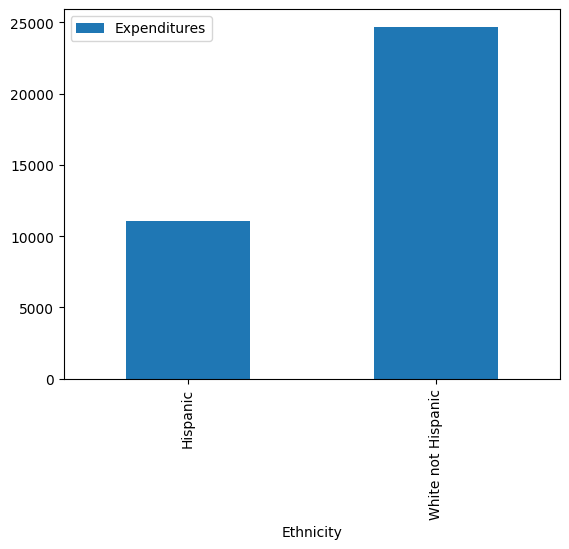

In [2]:
# YOUR CODE HERE
import pandas as pd

dataFrame = pd.read_csv('ca_dds_expenditures.csv')

pivot_dataFrame = dataFrame.pivot_table(values='Expenditures',index='Ethnicity',aggfunc='mean')
pivot_dataFrame.loc[['Hispanic','White not Hispanic']].plot(kind='bar')


**By looking at the resulting bar graph, we see that Hispanic residents have less expenditures than White residents. This may be a result of lower income, higher subsidies, or other factors.**

# Question 2

Now, calculate the average expenditures by ethnicity and age cohort. Make a graphic that compares the average expenditure on Hispanic residents and white (non-Hispanic) residents, _within each age cohort_. 

Comment on what you see. How do these results appear to contradict the results you obtained in Question 1?

<Axes: xlabel='Ethnicity,Age Cohort'>

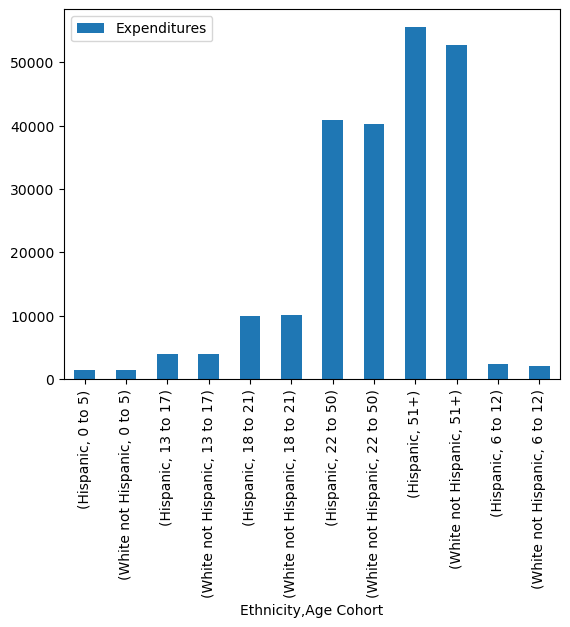

In [17]:
# YOUR CODE HERE
pivot_dataFrame = dataFrame.pivot_table(values='Expenditures',index=['Ethnicity','Age Cohort'],aggfunc='mean')

colors ={"Hispanic": "red", "White not Hispanic": "green"}

pivot_dataFrame.loc[['Hispanic','White not Hispanic']].sort_values(by='Age Cohort',ascending=True).plot(kind='bar')

**It seems that by age cohort there are approximately equal expenditures between both Hispanic and White residents. There can be several reasons for this. Firstly, there may be more white residents of age 50+, bringing the average white resident expenditures higher.**

# Question 3

Can you explain the discrepancy between the two analyses you conducted above (i.e., Questions 1 and 2)? Try to tell a complete story that interweaves tables, graphics, and explanation.

_Hint:_ You might want to consider looking at:

- the distributions of ages of Hispanics and whites
- the average expenditure as a function of age

<Axes: title={'center': 'White non-Hispanic'}, xlabel='Age Cohort'>

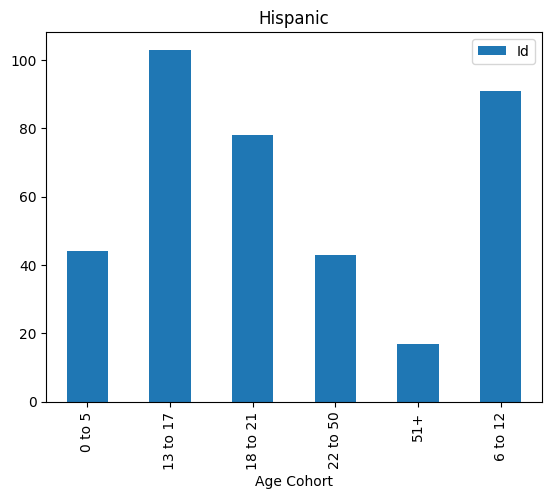

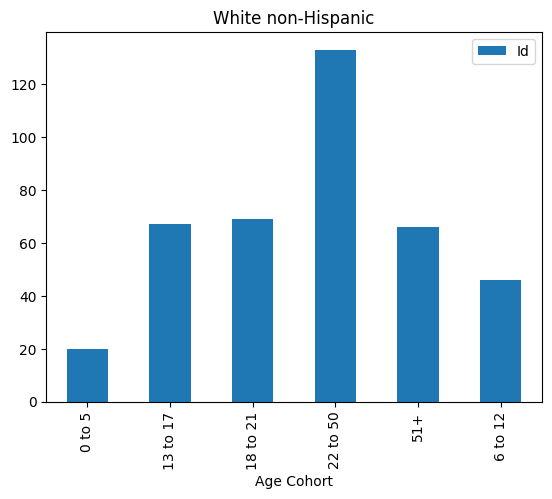

In [8]:
pivot_dataFrame = dataFrame.pivot_table(values='Id',index=['Ethnicity','Age Cohort'],aggfunc='count')

pivot_dataFrame.loc['Hispanic'].sort_values(by='Age Cohort',ascending=True).plot(kind='bar', title='Hispanic')
pivot_dataFrame.loc['White not Hispanic'].sort_values(by='Age Cohort',ascending=True).plot(kind='bar', title='White non-Hispanic')

One thing missing from the other graphs were counts of each age cohort. This is important because it tells us why our averages are so different even though expenditures for each age cohort are similar. By seeing the amount of individuals in each age cohort for each enthnicty group, it makes sense as to why average expeditures for white non-hispanics are much higher than hispanics. Due to a majority of hispanics falling under lower age groups which receive lower expenditures, and whites having a majority in higher age groups which receive higher expenditures, the intial graph in Q1 can be explained more properly.